In [3]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import json
# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

In [5]:
df_original = pd.read_csv('titles.csv')
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

df = df_original.copy()
df.info()
df.isnull().sum()
df['genres'] = df['genres'].str.strip("[]").str.replace("'", "")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

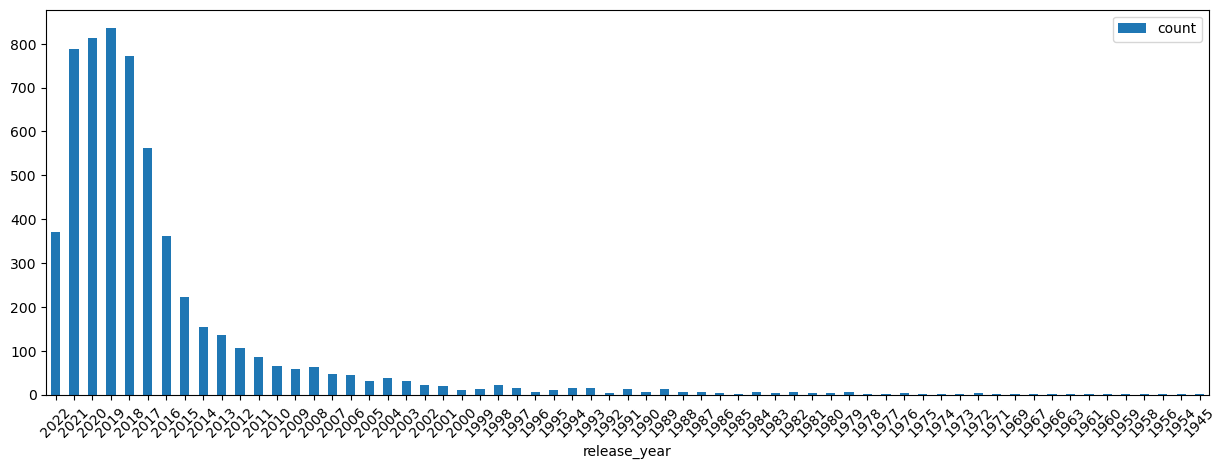

In [29]:
'''Genre popularity by IMDB Score over time
    Last 5 years most and least popular GENRES
    3 most popular MOVIES or TV SHOWS for most pop genres
    Which directors or actors to focus on according to most pop GENRE/rating'''

dfp = df['release_year'].value_counts().reset_index()
dfp.head()
dfp.sort_values('release_year',ascending = False).plot.bar(x='release_year', y='count', rot=45, figsize=(15,5))



In [32]:

df_1522=df[df['release_year']>=2015]
df_1522.shape
df_1522['release_year'].unique()

array([2015, 2016, 2018, 2017, 2019, 2020, 2022, 2021], dtype=int64)

In [35]:
df_credits = pd.read_csv('credits.csv')


In [55]:
#df_compo=pd.merge(df_1522,df_credits, how = 'left', on =['id'] )

directors = df_credits[df_credits['role']=='DIRECTOR']
directors.shape

df_compo=pd.merge(df_1522,directors, how = 'left', on =['id'] )
df_compo.shape
df_compo['id'].unique()
df_compo.head()


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,ts8,Better Call Saul,SHOW,Six years before Saul Goodman meets Walter Whi...,2015,TV-MA,49,"['drama', 'crime']",['US'],6.0,tt3032476,8.8,438575.0,273.296,8.500,NaN,NaN,NaN,NaN
1,ts37143,Alone,SHOW,Hardcore survivalists are put by themselves in...,2015,TV-MA,51,"['reality', 'documentation']",['US'],9.0,tt4803766,8.4,5037.0,26.930,7.000,NaN,NaN,NaN,NaN
2,ts38796,Stranger Things,SHOW,"When a young boy vanishes, a small town uncove...",2016,TV-14,61,"['scifi', 'thriller', 'drama', 'fantasy', 'hor...",['US'],5.0,tt4574334,8.7,1101055.0,2226.231,8.635,NaN,NaN,NaN,NaN
3,ts21867,Schitt's Creek,SHOW,Formerly filthy rich video store magnate Johnn...,2015,TV-14,22,['comedy'],['CA'],6.0,tt3526078,8.5,115758.0,25.254,7.600,NaN,NaN,NaN,NaN
4,ts41766,The Good Place,SHOW,"Eleanor Shellstrop, an ordinary woman who, thr...",2016,TV-14,23,"['scifi', 'romance', 'comedy', 'drama', 'fanta...",['US'],4.0,tt4955642,8.2,152884.0,33.793,8.000,NaN,NaN,NaN,NaN
